Phys 427 Assignment 4

Kai JIn

BDT(Boosted Decision Tree) A decision tree takes a set of input features and splits input data recursively based on those features. Boosting is a method of combining many weak learners (trees) into a strong classifier. Boosting is an ensemble technique in which the predictors are not made independently, but sequentially. In one word, BDT is a algorithm to combine many decision trees to make a better prediction.

NN(Neural Network) Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated. In short words, there is a weight for each variable to consider to influence the result. The variable has more weight has a greater influence on result.

Over fitting Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.

In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neural_network import MLPRegressor

title1 = '2D histogram for Predicted and Real Lxy of LLP'
title2 = '2D histogram for Predicted and Real Lxy of nLLP'

In [2]:
#Open root file
def open(filename):
    return uproot.open(filename)

In [3]:
#Get data from all root files and transfer them into pandas dataframe
file = open("./llpdata/df_1.root")
data1 = file["pandas_tree218"].pandas.df()
file.close()

file = open("./llpdata/df_2.root")
data2 = file["pandas_tree51358"].pandas.df()
file.close()

file = open("./llpdata/df_3.root")
data3 = file["pandas_tree53278"].pandas.df()
file.close()

file = open("./llpdata/df_4.root")
data4 = file["pandas_tree52558"].pandas.df()
file.close()

file = open("./llpdata/df_5.root")
data5 = file["pandas_tree53038"].pandas.df()
file.close()

file = open("./llpdata/df_6.root")
data6 = file["pandas_tree54718"].pandas.df()
file.close()

In [4]:
#Combine all data
frames = [data1, data2, data3, data4, data5, data6]
comb_data = pd.concat(frames, sort=False)

In [5]:
#Calculate Lxy and insert it into comb_data
Lxy = np.sqrt(np.add(np.square(comb_data['Lx']),np.square(comb_data['Ly'])))
comb_data['Lxy'] = Lxy

In [6]:
#Drop garbage column data
def drop_col(data, cols):
    return data.drop(data.columns[cols], axis=1)

In [7]:
#Get training and test data which LLP is true
LLP_data = drop_col(comb_data[comb_data.IsLLP == True], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 36, 37])

LLP_train_data = LLP_data.iloc[::2]
LLP_test_data = LLP_data.iloc[1::2]

In [8]:
#Build and train a decision tree
LLP_y = np.array(LLP_train_data['Lxy'])
LLP_X = np.array(LLP_train_data.drop(['Lxy'], axis=1))
clf1 = tree.DecisionTreeRegressor().fit(LLP_X, LLP_y)

In [9]:
#Predict Lxy value for LLP test data by BDT
LLP_y_test = np.array(LLP_test_data['Lxy'])
LLP_X_test = np.array(LLP_test_data.drop(['Lxy'], axis=1))
prediction1 = clf1.predict(LLP_X_test)

In [10]:
#Make a 2D histogram
def hist_2D(data1, data2, b, title):
    _=plt.hist2d(data1, data2, bins=b)
    plt.title(title)

In [11]:
#Calculate the difference between prediction and real data value
def get_error(v1, v2):
    return np.sum(np.absolute(v1-v2))


The error is 109892612.14492737


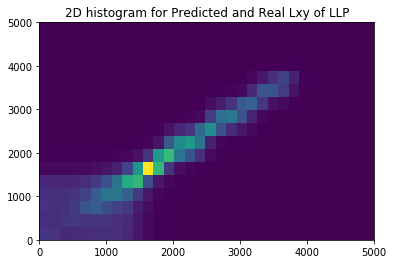

In [12]:
#Plot a 2D histogram graph for Lxy predicted by BDT with LLP data and check error
hist_2D(prediction1, LLP_y_test, 300, title1)
plt.xlim(0, 5000)
plt.ylim(0, 5000)

#Check error
error = get_error(prediction1, LLP_y_test)
print('\n' + "The error is " + str(error))

In [13]:
#Build and train a neural network with LLP data
LLP_X_short = LLP_X[0:10000]
LLP_y_short = LLP_y[0:10000]
clf2 = MLPRegressor(hidden_layer_sizes=25, max_iter=100000).fit(LLP_X_short, LLP_y_short)

In [14]:
#Predict Lxy value by NN
prediction2 = clf2.predict(LLP_X_test)


The error is 96004657.74092484


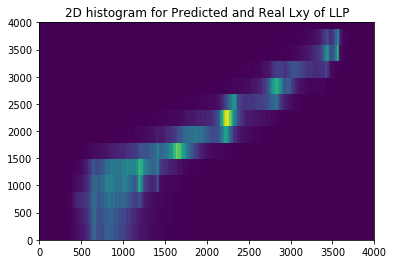

In [15]:
#Plot a 2D histogram graph of Lxy predicted by NN with LLP data and check error
hist_2D(prediction2, LLP_y_test, 300, title1)
plt.xlim(0, 4000)
plt.ylim(0, 4000)

#Check error
error = get_error(prediction2, LLP_y_test)
print('\n' + "The error is " + str(error))

Based on graphs and error values, we can see both NN and BDT have a similar performance. It seems NN has a better precise. I try to run these predictions several times, sometimes BDT does a better job, sometimes NN does. However, I don not train NN with whole because of limitation of my old laptop, I think NN has a greater potential to make a better prediction. To be honest, both of them do not have a good prediction about Lxy based on error values.

In [16]:
#Get test data which LLP is false
nLLP_data = drop_col(comb_data[comb_data.IsLLP == False], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 36, 37])

nLLP_y_test = np.array(nLLP_data['Lxy'])
nLLP_X_test = np.array(nLLP_data.drop(['Lxy'], axis=1))


The error is 2952292877.073623


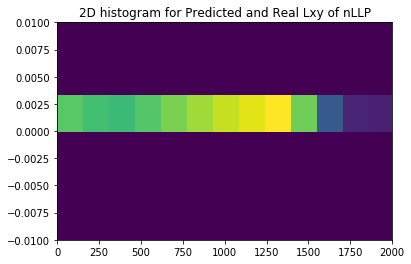

In [17]:
#Predict non_LLP Lxy value by BDT and make 2D histogram and error check
prediction3 = clf1.predict(nLLP_X_test)

#Plot a 2D histogram graph
hist_2D(prediction3, nLLP_y_test, 300, title2)
plt.xlim(0, 2000)
plt.ylim(-0.01, 0.01)

#Check error
error = get_error(prediction3, nLLP_y_test)
print('\n' + "The error is " + str(error))


The error is 2399107660.107592


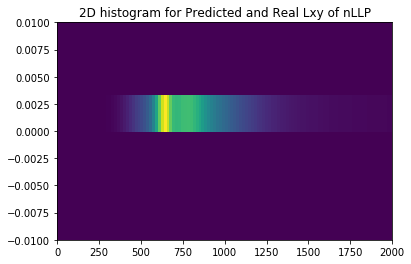

In [18]:
#Predict nLLP Lxy value by NN and make 2D histogram and error check
prediction4 = clf2.predict(nLLP_X_test)

#Plot a 2D histogram graph
hist_2D(prediction4, nLLP_y_test, 300, title2)
plt.xlim(0, 2000)
plt.ylim(-0.01, 0.01)

#Check error
error = get_error(prediction4, nLLP_y_test)
print('\n' + "The error is " + str(error))

The NN has a better ability to predict the situation which it never learns before. This is true for several trials. However, I have to see the accuracy rate of these two models is not good.

In [19]:
#Build a new training data with LLP data and some nLLP data for BDT
mix_y = np.concatenate((LLP_y, nLLP_data['Lxy'][:100]), axis=None)
mix_X = np.concatenate([LLP_X, np.array(nLLP_data.drop(['Lxy'], axis=1)[:100])], axis=0)

#Build a new BDT trained by mix data
clf3 = tree.DecisionTreeRegressor().fit(mix_X, mix_y)


The error is 109979769.49258348


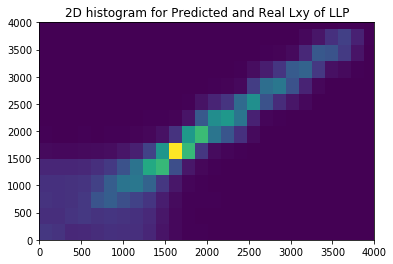

In [20]:
#Predict Lxy value of LLP by new BDT and make 2D histogram and error check
prediction5 = clf3.predict(LLP_X_test)

#Plot a 2D histogram graph
hist_2D(prediction5, LLP_y_test, 300, title1)
plt.xlim(0, 4000)
plt.ylim(0, 4000)

#Check error
error = get_error(prediction5, LLP_y_test)
print('\n' + "The error is " + str(error))


The error is 2965453125.3277364


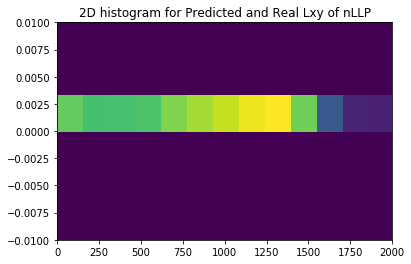

In [21]:
#Predict Lxy value of nLLP by new BDT and make 2D histogram and error check
prediction6 = clf3.predict(nLLP_X_test)

#Plot a 2D histogram graph
hist_2D(prediction6, nLLP_y_test, 300, title2)
plt.xlim(0, 2000)
plt.ylim(-0.01, 0.01)

#Check error
error = get_error(prediction6, nLLP_y_test)
print('\n' + "The error is " + str(error))

In [30]:
#Build a new training data with LLP data and some nLLP data for NN
mix_y_short = np.concatenate((LLP_y_short, nLLP_data['Lxy'][:100]), axis=None)
mix_X_short = np.concatenate([LLP_X_short, np.array(nLLP_data.drop(['Lxy'], axis=1)[:100])], axis=0)

#Build a new NN trained by mix data
clf4 = MLPRegressor(hidden_layer_sizes=25, max_iter=100000).fit(mix_X_short, mix_y_short)


The error is 94673396.45039529


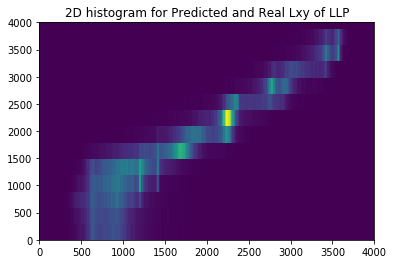

In [31]:
#Predict Lxy value of LLP by new NN and make 2D histogram and error check
prediction7 = clf4.predict(LLP_X_test)

#Plot a 2D histogram graph
hist_2D(prediction7, LLP_y_test, 300, title1)
plt.xlim(0, 4000)
plt.ylim(0, 4000)

#Check error
error = get_error(prediction7, LLP_y_test)
print('\n' + "The error is " + str(error))


The error is 2355770815.725195


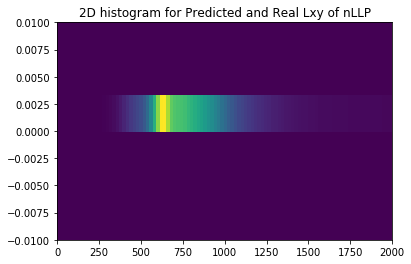

In [32]:
#Predict Lxy value of nLLP by new NN and make 2D histogram and error check
prediction8 = clf4.predict(nLLP_X_test)

#Plot a 2D histogram graph
hist_2D(prediction8, nLLP_y_test, 300, title2)
plt.xlim(0, 2000)
plt.ylim(-0.01, 0.01)

#Check error
error = get_error(prediction8, nLLP_y_test)
print('\n' + "The error is " + str(error))

I try this trial several times, it seems it's bad for BDT when we add some nLLP data to build a LLP prediction model. For NN, it helps to predict Lxy of LLP in many times, however, it may decrease the accuracy of Lxy in some cases. I think it may be caused by randomness of the model.

Overall, I think add some nLLP data is good for NN to predict Lxy of LLP, and it has bad influence for BDT to predict Lxy of LLP.

In [25]:
#Get train data with LLP and more non-LLP data for BDT
BDT_train_data = pd.concat([LLP_data.iloc[::2].iloc[::2], nLLP_data.iloc[::2].iloc[::2]], sort=False)

In [26]:
#Build a new BDT with new mixed data
BDT_y = np.array(BDT_train_data['Lxy'])
BDT_X = np.array(BDT_train_data.drop(['Lxy'], axis=1))
clf5 = tree.DecisionTreeRegressor().fit(BDT_X, BDT_y)


The error is 195860617.6869446


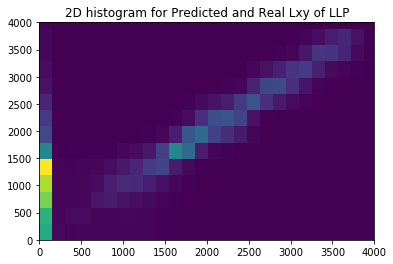

In [27]:
#Predict Lxy value of LLP by new BDT and make a 2D histogram graph and error check
prediction9 = clf5.predict(LLP_X_test)

#Plot a 2D histogram
hist_2D(prediction9, LLP_y_test, 300, title1)
plt.xlim(0, 4000)
plt.ylim(0, 4000)

#Check error
error = get_error(prediction9, LLP_y_test)
print('\n' + "The error is " + str(error))

In [28]:
#Get train data with LLP and more non-LLP data for NN and build a new NN
NN_train_data = pd.concat([LLP_data[0:5000], nLLP_data[0:5000]], sort=False)

NN_X_short = np.array(NN_train_data.drop(['Lxy'], axis=1))
NN_y_short = np.array(NN_train_data['Lxy'])
clf6 = MLPRegressor(hidden_layer_sizes=25, max_iter=100000).fit(NN_X_short, NN_y_short)


The error is 154711577.54786938


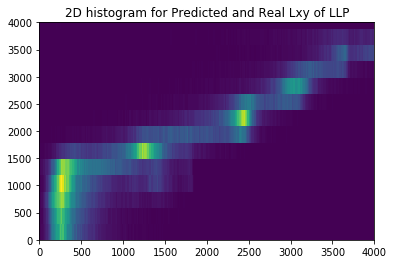

In [29]:
#Predict Lxy value of LLP by new NN and make a 2D histogram graph and error check
prediction10 = clf6.predict(LLP_X_test)

#Plot a 2D histogram
hist_2D(prediction10, LLP_y_test, 300, title1)
plt.xlim(0, 4000)
plt.ylim(0, 4000)

#Check error
error = get_error(prediction10, LLP_y_test)
print('\n' + "The error is " + str(error))


The error is 265012992.87395844


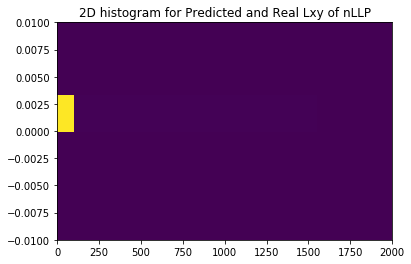

In [35]:
#Predict Lxy value of nLLP by new BDT and make a 2D histogram graph and error check
prediction11 = clf5.predict(nLLP_X_test)

#Plot a 2D histogram
hist_2D(prediction11, nLLP_y_test, 300, title2)
plt.xlim(0, 2000)
plt.ylim(-0.01, 0.01)

#Check error
error = get_error(prediction11, nLLP_y_test)
print('\n' + "The error is " + str(error))


The error is 1139268834.3320727


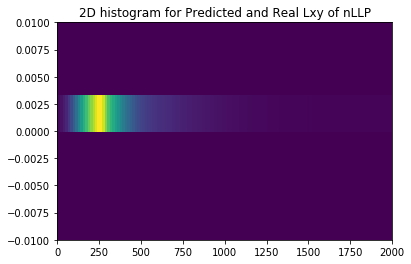

In [34]:
#Predict Lxy value of nLLP by new NN and make a 2D histogram graph and error check
prediction12 = clf6.predict(nLLP_X_test)

#Plot a 2D histogram
hist_2D(prediction12, nLLP_y_test, 300, title2)
plt.xlim(0, 2000)
plt.ylim(-0.01, 0.01)

#Check error
error = get_error(prediction12, nLLP_y_test)
print('\n' + "The error is " + str(error))

If we increase the amount of nLLP data in training data, it is much helpful for the model to predict Lxy values of nLLP data, however, it sacrifices the accuracy to predict LLP Lxy. Based on the difference if error values, I think it may worth to do this because the accuracy rate increasing in nLLP Lxy is larger than accuracy of LLP Lxy decreasing. This is only my own judge based on data I have seen, it may be different if we feed ore data to NN or change other situations.

Overall, I think NN is more multifunction than BDT, however, BDT trains much faster and can do a good job to predict the result of situations which it has learned.